<a name="cell-TOC-f"></a>

### 5. [Representating Functions](#cell-f)

  0. [Function (Vector) Spaces](#cell-f-concept)  
     0. [Inner (dot) Products](#cell-f-def-dot)
     1. [[OMITTED] Norms](#cell-f-def-norm)
       - [[OMITTED] Matrix Norms](#cell-f-def-metric-matrix)
     2. [[OMITTED] Metrics](#cell-f-def-metric)
     3. [[REVIEW] Linear Independence, Orthogonality, and Basis Sets](#cell-f-def-basis)
  1. [Fourier Coefficients](#cell-f-def-fourier-coefs)
     0. [[OMITTED] Convergence Terminology](#cell-f-def-convergence)  

  1. [Polynomial Bases$\;$](#cell-f-poly)
    0. [Linearly Independent Bases: Taylor Series and the Monomials](#cell-f-poly-lindep)  
       - [Laplace (Taylor Series) Approximation](#cell-f-examples)
    0. [Standard (Orthogonal) Bases](#cell-f-poly-Legendre)
      - [Comparing Bases: Legendre versus Laguerre Polynomials for](#cell-f-examples-lpolys) [$e^{-x}$](#cell-f-examples-lpolys)
      - [[OMITTED] The Three-Term Recurrence Relation for Evaluating](#cell-f-poly-eval) [$ f(x)$](#cell-f-poly-eval)
      - [[OMITTED] The Christoffel-Carboux Formula for Evaluating](#cell-f-poly-eval) [$ f(x)f(y)$](#cell-f-poly-eval-ccf)
      - [[OMITTED] Details and Examples](#cell-f-poly-sob)
          - [[OMITTED] Legendre Polynomials](#cell-f-poly-Legendre) [$P_k$](#cell-f-poly-Legendre)
          - [[OMITTED] Chebyshev Polynomials](#cell-f-poly-Legendre) [$T_k$](#cell-f-poly-Legendre)
          - [[OMITTED] Jacobi Polynomials](#cell-f-poly-Legendre) [$Q_k$](#cell-f-poly-Legendre)
          - [[OMITTED] Laguerre Polynomials](#cell-f-poly-Legendre) [$L_k^{(\alpha-1)}$](#cell-f-poly-Legendre)
          - [[OMITTED] Chebyshev-Hermite Polynomials](#cell-f-poly-Legendre) [$H_k^e$](#cell-f-poly-Legendre)
          - [[OMITTED] Hermite Polynomials](#cell-f-poly-Legendre) [$H_k$](#cell-f-poly-Legendre)
          - [[OMITTED] Hermite Exponentially Tilted Polynomial Functions](#cell-f-poly-Legendre)
          - [[OMITTED] Density Approximation with Chebyshev-Hermite Polynomials](#cell-f-examples-gram)
          - [[OMITTED] Gram–Charlier and Edgeworth Series and Cornish-Fisher Expansion](#cell-f-examples-gram)


> "Programming is only learned by programming. (Read that again.)"
>
> -- James E. Gentle
>
> Section 3.5 **Programming** in Chapter 3 **Algorithms and Programming** of **Computational Statistics**, page 134.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
# https://patsy.readthedocs.io/en/latest/spline-regression.html
from patsy import dmatrix, bs, build_design_matrices
plt.style.use('seaborn-colorblind')

import statsmodels.api as sm
from scipy import stats
import scipy
import pandas as pd

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
# https://stackoverflow.com/questions/36252434/predicting-on-new-data-using-locally-weighted-regression-loess-lowess
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
from scipy.interpolate import interp1d
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from IPython.display import YouTubeVideo

<a name="cell-f"></a>
# 5. Representing Functions ([Return to TOC](#cell-TOC-f))
---


Just as a three dimensional point $v=(x,y,z)$ can be represented as

$$x \cdot \left[\begin{array}{c}1\\0\\0\end{array}\right]
+ y \cdot \left[\begin{array}{c}0\\1\\0\end{array}\right]
+ z \cdot \left[\begin{array}{c}0\\0\\1\end{array}\right]
= \sum_{k=0}^2 v_k b_k
$$

an element in second order polynomial ***function space*** can be represented as

$$\text{second order polynomial } f(x) = \sum_{k=0}^2 c_k x^k$$

where $x^k$ is a ***basis function*** just as $b_k = e_k$ is a (standard) ***basis vector*** so that $b_k$ and $x^k$ are analagously the axes on which the coordinates $v_k$ and $c_k$ are respectively located. Thus, each function in a ***function space*** is just a coordinate or ***vector***.

> The perspective that a function is a point in space suggests that
> - similarly to how ***PCA*** provides a lower dimensional representation of a data set
- or just as ${\rm I\!R}$ are is inevitably approximated with available representations in ${\rm I\!F}$
>
> so too might it be expeditious to represent a function $f(x)$ with a reduced representation through a truncated approximation of simpler composite components.
>
> Indeed, many functions $f(x)$ can be well ***approximated*** as weighted sum of well-chosen ***basis functions***. The optimial weights of such a representation are known as ***Fourier coefficients***. This is of course of interest when an approximation of a function may provide good tradeoffs between accuracy requirements and the computational cost of evaluating $f(x)$ exactly.


<a name="cell-f-concept"></a>

# 5.0 Function (Vector) Spaces ([Return to TOC](#cell-TOC-f))

---

The set of $x \in {\rm I\!R}^d$
- may be ***added*** and ***scaled*** and are unaltered by the ***additive identity element***
- and may be operated upon with ***inner product***, ***norm***, and ***metric*** operations

and thus forms a ***vector space***. But ***function spaces*** also support these operations and thus are also ***vector spaces***.

<a name="cell-f-def-dot"></a>

## 5.0.0 Inner (dot) Products ([Return to TOC](#cell-TOC-f))
---

The ***Inner*** (***dot***) ***product*** (for functions)
    
\begin{align*}\langle f,g \rangle & {} =  \int_D f(x)g(x)dx && \left[ \text{like }\langle x,y \rangle = \sum_i x_iy_i = x^Ty \right]\\
  \text{or } \mathbf{\langle f,g \rangle} & {} =  \mathbf{\int_D f(x)g(x)w(x)dx} && \left[ \text{like } \underset{\text{product dot}}{\overset{\text{elliptical}}{x^T Wy}}  \text{ for weight function } w(x) \right]\\
  \text{satisfies} & {} \quad \langle x,x \rangle \geq 0 && \text{(nonnegativity)} \\
   & {} \quad \langle x,0 \rangle = \langle 0,x \rangle = \langle 0,0 \rangle =  0 && \text{(additive identity element absorption)} \\  
   & {} \quad \langle x,y \rangle = \langle y,x \rangle  && \text{(commutativity)} \\  
   & {} \quad \langle ax,y \rangle = a\langle x,y \rangle, a \in {\rm I\!R}  && \text{(scalar factorization)} \\  
   & {} \quad \langle x+y,z \rangle = \langle x+z,y+z \rangle && \text{(distributive addition)} \\  
   & {} \quad |\langle x,y \rangle| \leq \langle x,x \rangle^{\frac{1}{2}} \langle y,y \rangle^{\frac{1}{2}} && \text{(Cauchy-Schwarz inequality)} \\  
  \end{align*}

where the integrals must exist, and complex numbers require [***complex inner products***](https://en.wikipedia.org/wiki/Inner_product_space#Hilbert_space) based on [***complex conjugates***](https://en.wikipedia.org/wiki/Complex_conjugate), i.e., $\langle f,g \rangle =  \int_D f(x)\overline{g(x)}w(x) dx$.

<a name="cell-f-def-norm"></a>

## 5.0.1 [OMITTED] Norms and Matrix Norms ([Return to TOC](#cell-TOC-f))
---

A ***Norm*** $||\cdot||$ measures element "size" and satisfies
    
\begin{align*}
  ||x|| & \geq {} 0 & & \text{(nonnegativity)} \\
  ||0|| & = {} 0 & & \text{(identity element, relaxed for non-measurable sets for functions)} \\
  ||ax|| & = {} |a|||x||, a \in {\rm I\!R} & & \text{(scalar factorization)} \\
  ||x+y|| & \leq {} ||x||+||y|| & & \text{(triangle inequality)} \\
|\langle x,y \rangle | & \leq {} ||x||\times||y|| & & \text{(re-expressed Cauchy-Schwarz inequality)}
\end{align*}

These requirements are satisfied by the ubiquitous $L_p$ ***norms***

$$||x||_p = \left( \left\langle |x|^{\frac{p}{2}}, |x|^{\frac{p}{2}} \right\rangle \right)^{\frac{1}{p}}$$
  
E.g., $||f||_2^2 = \int_D f(x)^2w(x)dx < \infty$ defines the ***vector space*** of ***squared-integrable functions***, $f \in L^2(D)$. And another ***norm*** commonly observed for functions is the ***Chebyshev*** or ***uniform norm*** $L_\infty$ $||f||_\infty = \underset{p \rightarrow \infty}{\lim} ||f||_p =\, $[$\underset{D}{\sup}$](https://math.stackexchange.com/questions/160451/difference-between-supremum-and-maximum) $|f(x)w(x)|$

> The "roughness" or "variation" of a function as measured by
>
> $$\int_D \left( f(x) - \int_D f(x)dx\right)^2 dx $$
>
> for density functions $f$ with unit mass can be characterized by the dominating term
>
> $$||f(x)||_2^2$$
>
> Alternatively, another "roughness" measure could be $||f''(x)||_2^2$ (upon which the ***regularization term*** of [***cubic smoothing splines***](#cell-sovling-smoothing) is based) since the second derivative of the function $f(x)$ measures how quickly the instantaneous slope changes and so this provides a measure of "smoothness" of $f(x)$.

<a name="cell-f-def-metric-matrix"></a>

### [OMITTED] Matrix Norms ([Return to TOC](#cell-TOC-f))
---

In addition to the required properties above, ***matrix norms*** are often chosen to additionally satisfy

\begin{align*}
||AB|| \leq {} & ||A||\! \cdot \!||B|| && \text{(a consistency property)}
  \end{align*}

e.g., as in the case of the ***induced matrix norm*** $M$ for ***vector norm*** $v$

$$||A||_M = \underset{x\not=0}{\max} \frac{||Ax||_v}{||x||_v} \quad \underset{\text{since $||x||_v > 0$}}{\Longrightarrow} \quad ||Ax||_v \leq ||x||_v ||A||_M $$

> Since matrices can be viewed as ***linear operators*** which transform vectors into other vectors
> > just as derivatives are ***linear operators*** which transform vectors (functions) into other vectors (functions)
>
> then just as there are ***norms*** for ***matrices*** and ***functions***, so too are there ***norms*** for ***operators***.

<a name="cell-f-def-metric"></a>

## 5.0.2 [OMITTED] Metrics ([Return to TOC](#cell-TOC-f))
---

A ***Metric*** measures "distance" between two elements and satisfies

\begin{align*}
  \Delta(x,y) & \geq {} 0 & & \text{(nonnegativity)} \\
  \Delta(x,x) & = {} 0 & & \text{(equality identity)} \\
  \Delta(x,y)  & = {} \Delta(y,x)  & & \text{(commutitivity)} \\
  \Delta(x,z) & \leq {} \Delta(x,y) + \Delta(y,z) & & \text{(triangle inequality)}
\end{align*}

These requirements are met by the ubiquitous $L_p$ ***metrics***

$$\Delta_p(x,y) = ||x-y||_p$$


A notable measure that is often used in place of a ***metric*** when comparing two statistical distributions (i.e., a particular class of functions) is ***Kullback–Leibler (KL) divergence***.  

$$D_{\text{KL}}(P\parallel Q) = \int_{-\infty}^{\infty} p(x)\log \left({\frac {p(x)}{q(x)}}\right) dx $$

***KL divergence*** is **not** a ***metric*** because it's not symmetric and as well does not satisfy the triangle inequality.

> For vectors in ${\rm I\!R}^d$
> $$\Delta_2^A(x,y) = \overset{\large \text{the elliptical metric}}{\sqrt{(x-y)^TA(x-y)}} \quad \text{ generalizes } \quad \Delta_2 = \overset{\large \text{the Euclidean metric}}{\sqrt{(x-y)^T(x-y)}}$$
>
> just as $L_2^A \equiv ||\cdot||_2^A$ generalizes ***euclidean norm*** $L_2 \equiv ||\cdot||_2$.  And when $A = \Sigma^{-1}$ (the inverse of a covariance matrix) the ***elliptical metric*** is called ***Mahalanobis distance*** .  
- ***Squared Mahalanobis distance*** is not a ***metric*** because it won't satisfy the triangle inequality; nonetheless, ***Squared Mahalanobis distance*** is often just referred to as ***Mahalanobis distance***.
>
> Since the ***inner (dot) product*** for functions already includes the weight fuction $w(x)$, ***function metrics*** are already generalized analogously to ***elliptical distance***.  And since the weight function $w(x)$ is usually specified to be a density function, ***function norms*** also generalize ***Mahalanobis distance*** from characterizing distance with respect to the shape of a multivariate normal distribution, to characterizing the distance with respect to any density $w(x)$.

<a name="cell-f-def-basis"></a>

## 5.0.3 [REVIEW] Linear Independence, Orthogonality, and Basis Sets ([Return to TOC](#cell-TOC-f))
---

***Linear independence*** of ***vector space*** elements $\{v_k: k = 0, \cdots, d\}$ means only when $a_0 = a_1 = \cdots = a_d = 0$ does

$$a_0v_0 + a_1v_1 + \cdots + a_dv_d = 0 \quad \text{(or "almost everywhere" for functions)}$$

> The ***monomials***: $1, x, x^2, ...$ are ***linearly independent***.

A ***basis set*** for ***vector space*** $\mathcal X$ is a ***linear independent*** set of elements $\mathcal B = \{b_k \in \mathcal X: k = 0, \cdots, d\}$ which is a ***generating*** or ***spanning set*** of $\mathcal X$ so that any $x \in \mathcal X$ can be formed as a linear combination of the elements in $\mathcal B$.
  
> The  ***monomials*** up to $x^d$ $x = \sum_k a_k x^k$ form a ***basis set*** for the ***function*** (i.e., ***vector***) ***space*** of all polynomial functions of order $d$ or less.

***Orthonormal vectors*** are denoted as $x_1 \perp x_2$ and are ***orthogonal*** so $\langle x_1, x_2 \rangle = 0$ and  ***normalized*** so  $||x_1|| = ||x_2|| = 1$. ***Orthogonal vectors*** are necessarily ***linearly independent***, but not all ***linearly independent*** vectors are ***orthogonal***.

> The ***monomials*** $1$ and $x$ are ***orthogonal*** over $[-1,1]$ for constant weight function $w(x)$ since $\langle 1, x \rangle = \int_{-1}^1 x dx  = 0$.

- **Terminology Warning**: if $x \in {\rm I\!R}^d$ is ***normalized*** then $||x||=1$ and $x$ is called a ***normal vector***; however, if $||f||_p=1$ for $f \in L^p$ (***Lebesgue***) space then $f$ is called ***normalized*** but it is **not** referred to as a "normal function". Instead, in the $L^p$ context, the term "normal function" is reserved for density functions $p(x)$ and weight functions $w(x)$ with unit mass, and $p(x)$ and $w(x)$ are **not** colloquially referred to as "normalized" functions since, e.g., it's generally the case that $||w||_p \not = 1$ even if $w(x)$ is a density functions with unit mass.  

<a name="cell-f-def-fourier-coefs"></a>

# 5.1 Fourier Coefficients ([Return to TOC](#cell-TOC-f))
---

For an ***orthogonal basis*** $\{b_k\}$ of vector space $\mathcal X$, $f \in \mathcal X$ may be represented as

$$f = \sum_k \langle f, b_k \rangle b_k$$

with the ***Fourier coefficients*** $\{\langle f, b_k \rangle\}$, and for any approximation of $f$ based on a finite subset of $\{b_k\}$, the ***Fourier coefficients*** give the smallest possible ***squared error***  

$$|| f - \sum_{k=0}^d  \langle f, b_k \rangle b_k ||_2^2 \leq || f - \sum_{k=0}^d  a_kb_k ||_2^2$$

Further, since

\begin{align*}||f||_2^2 = & {} \left \langle \sum_k \langle f, b_k \rangle b_k, \sum_k \langle f, b_k \rangle b_k \right \rangle \\
  = & {}  \sum_{k,k'} \big \langle \langle f, b_k \rangle b_k , \langle f, b_{k'} \rangle b_{k'} \big \rangle \\
  = & {}  \sum_{k} \big \langle \langle f, b_k \rangle b_k , \langle f, b_{k} \rangle b_{k} \big \rangle \\
  = & {}  \sum_{k} \langle f, b_k \rangle^2
\end{align*}
  
***Bessel's inequality***

$$\sum_{k=0}^d  \langle f, b_k \rangle^2\leq \sum_{k=0}^\infty \langle f, b_k \rangle^2 = ||f||_2^2$$

which is useful for showing convergence of sequences of elements in a ***function space*** is obvious.

<a name="cell-f-def-convergence"></a>

## 5.1.0 [OMITTED] Convergence Terminology ([Return to TOC](#cell-TOC-f))
---

For $f$ in ${\rm I\!R}^d$ or $L^2$ we have that $\underset{d\rightarrow \infty}{\lim} \sum_{k=0}^d  \langle f, b_k \rangle b_k = \underset{d\rightarrow \infty}{\lim} f_d \rightarrow f$ because

  - the finite dimensional vector space ${\rm I\!R}^d$ and the ***space of square-integrable functions*** $L^2$ are ***Hilbert spaces***
  - a ***Hilbert space*** is a ***closed Banach space*** with a norm based on an inner product
  - a ***closed space*** contains all it's limit points
  - a ***Banach space*** is a ***complete space*** with a norm  
  - in a ***complete space*** every ***Cauchy sequence converges uniformly*** to a member in the space
  - a ***sequence*** is ***Cauchy*** if for $\epsilon>0$ there is an $M$ such that $||f_i-f_j|| < \epsilon$ for all $i,j \geq M$
  - a ***sequence converges uniformly*** to $f$ if for $\epsilon>0$ there is an $M$ such that $||f_i(x)-f(x)|| < \epsilon$ for all $i \geq M$ and all $x$

<a name="cell-f-poly"></a>

# 5.2 Polynomial Bases ([Return to TOC](#cell-TOC-f))

---

This section presents polynomials as specific examples of basis functions, emphasizes their characteristics as basis functions, and demonstrates some applications where they are used.

<a name="cell-f-poly-lindep"></a>

## 5.2.0 Linearly Independent Bases: Taylor Series and the Monomials ([Return to TOC](#cell-TOC-f))

---

The ***monomials*** $\{1, x, x^2, ...\} = \{x^k: k=0,1,...\}$ are a set of ***linearly independent*** elements of a function space that form a ***basis*** $\{b_k\}$ for [***analytic functions***](https://en.wikipedia.org/wiki/Analytic_function) which have a ***Taylor series expansion***

$$f(x) = \underset{f^{(k)} \text{ is the } k^{th} \text{ derivative of } f}{\sum_{k=0}^{\infty} \frac{f^{(k)}(x_0)}{k!}(x-x_0)^k}\quad \text{ with } \quad \underset{\text{where the truncated sum }\textbf{approximates } f}{f(x) \approx \sum_{k=0}^{K} \frac{f^{(k)}(x_0)}{k!}(x-x_0)^k}$$

The coefficients for the ***monomial basis*** produced by the ***Taylor series approximation***

- are not equal to $c_k = \langle f, b_k\rangle$
- for an ***orthogonal bases*** $\{b_k\}$

so they do not represent an $L_2$-optimal ***approximation*** for $f(x)$ and so we do not have  

$$ \left|\left|f(x) - \sum_{k=0}^{K} c_k b_k \right|\right|_2 \;\leq\; \left|\left|f(x) - \sum_{k=0}^{K} a_k b_k \right|\right|_2 $$

although, the ***approximation*** may be good for $x$ near $x_0$.

> Just as ***linearly independent*** vectors may be ***orthogonalized*** ***Gram-Schmidt orthogonalization process***, so too may basis functions be ***orthogonalized*** using a ***Gram-Schmidt orthogonalization process*** (for functions).

<a name="cell-f-examples"></a>

### Laplace (Taylor Series) Approximation ([Return to TOC](#cell-TOC-f))

---

For ***nonnegative differentiable*** and ***concave*** $f$, since $\log$ is ***monotonically increasing***

$$g(x) = \log(f(x)) \quad \text{satifies} \quad f'(x^*)=0=g'(x^*)$$

so that the ***second order Taylor series approximation*** of $g(x)$ around $x^* = \text{argmax } g(x) = \text{argmax } f(x)$ gives

$$ f(x) \approx \underbrace{\exp \left( g(x^*) + g''(x^*)\frac{(x-x^*)^2}{2}\right)}_{\text{a so-called }\textbf{exponentially tilted measure } \longrightarrow} = \exp(g(x^*)) \left(\frac{-g''(x^*)}{2\pi}\right)^{-\frac{1}{2}}\text{N}\!\left(x^*, -g''(x^*)^{-1}\right) $$

from which we immediately have the ***Laplace approximation*** of the integral

$$\begin{align*}
\int^\infty_{-\infty} f(x) dx \approx {} & \exp(g(x^*)) \left(\frac{-g''(x^*)}{2\pi}\right)^{-\frac{1}{2}}\\
= {} & f(x^*) \left(\frac{-\frac{d^2}{dx^2}\log(f(x^*))}{2\pi}\right)^{-\frac{1}{2}}
\end{align*}$$

In [ ]:
# f = N(0,2)
# g(x) = log(f(x)) = c - 1/2var(x-x*)^2
# ~g(x) = g(x*) + g'(x*)(x-x*) + g''(x*)(x-x*)^2/2
# exp(~g(x)) ~= f(x)
# g'(x*) = 0 (by construction)
# g''(x) = d2/x2 -1/2var(x-x*)^2 = d/dx -(x-x*)/var = -1/var
stats.norm(scale=2).pdf(0) * (-(-1/4)/(2*np.pi))**(-0.5)
# a very good approximation!

In [ ]:
integrate.quad(lambda x: stats.norm(0,2).pdf(x), -10, 10)
# as the area of a probability density function is of course one!

*This example is inspired by the **Expansion in Monomials** section of Chapter 4.2 **Basis Sets in Function Spaces** on pages 160-161 of James E. Gentle's **Computational Statistics** textbook. [Errata Warning: equations 4.21 and 4.22 incorrectly write $g'(x_0)$ when this should be $g(x_0)$, as in equation 4.23; and, equation 4.22 fails to include a normalizing constant, which is again corrected in equation 4.23.]*

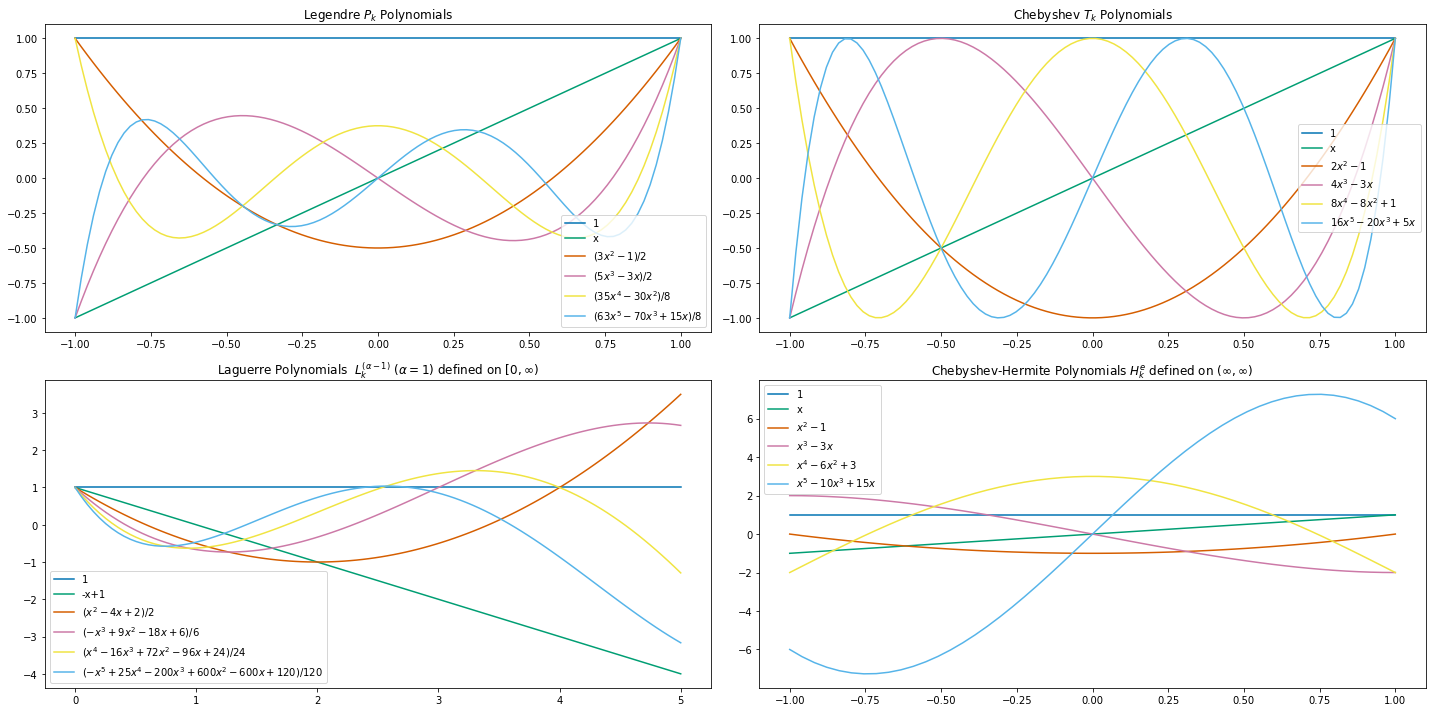

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

domain = np.linspace(-1,1,100)
ax[0,0].plot(domain, 1+0*domain, label='1')
ax[0,0].plot(domain, domain, label='x')
ax[0,0].plot(domain, (3*domain**2-1)/2, label='$(3x^2-1)/2$')
ax[0,0].plot(domain, (5*domain**3-3*domain)/2, label='$(5x^3-3x)/2$')
ax[0,0].plot(domain, (35*domain**4-30*domain**2+3)/8, label='$(35x^4-30x^2)/8$')
ax[0,0].plot(domain, (63*domain**5-70*domain**3+15*domain)/8, label='$(63x^5-70x^3+15x)/8$')
ax[0,0].set_title('Legendre $P_k$ Polynomials')
ax[0,0].legend()

domain = np.linspace(-1,1,100)
ax[0,1].plot(domain, 1+0*domain, label='1')
ax[0,1].plot(domain, domain, label='x')
ax[0,1].plot(domain, 2*domain**2-1, label='$2x^2-1$')
ax[0,1].plot(domain, 4*domain**3-3*domain, label='$4x^3-3x$')
ax[0,1].plot(domain, 8*domain**4-8*domain**2+1, label='$8x^4-8x^2+1$')
ax[0,1].plot(domain, 16*domain**5-20*domain**3+5*domain, label='$16x^5-20x^3+5x$')
ax[0,1].set_title('Chebyshev $T_k$ Polynomials')
ax[0,1].legend()

domain = np.linspace(0,5,100) # [0, infinity)
ax[1,0].plot(domain, 1+0*domain, label='1')
ax[1,0].plot(domain, -domain+1, label='-x+1')
ax[1,0].plot(domain, (domain**2-4*domain+2)/2, label='$(x^2-4x+2)/2$')
ax[1,0].plot(domain, (-domain**3+9*domain**2-18*domain+6)/6, label='$(-x^3+9x^2-18x+6)/6$')
ax[1,0].plot(domain, (domain**4-16*domain**3+72*domain**2-96*domain+24)/24, label='$(x^4-16x^3+72x^2-96x+24)/24$')
ax[1,0].plot(domain, (-domain**5+25*domain**4-200*domain**3+600*domain**2-600*domain+120)/120, label='$(-x^5+25x^4-200x^3+600x^2-600x+120)/120$')
ax[1,0].set_title('Laguerre Polynomials  $L_k^{(\\alpha-1)}$ ($\\alpha=1$) defined on $[0,\infty)$')
ax[1,0].legend()

domain = np.linspace(-1,1,)
ax[1,1].plot(domain, 1+0*domain, label='1')
ax[1,1].plot(domain, domain, label='x')
ax[1,1].plot(domain, domain**2-1, label='$x^2-1$')
ax[1,1].plot(domain, domain**3-3*domain, label='$x^3-3x$')
ax[1,1].plot(domain, domain**4-6*domain**2+3, label='$x^4-6x^2+3$')
ax[1,1].plot(domain, domain**5-10*domain**3+15*domain, label='$x^5-10x^3+15x$')
ax[1,1].set_title('Chebyshev-Hermite Polynomials $H_k^e$ defined on $(\infty,\infty)$')
ax[1,1].legend()

plt.tight_layout()

<a name="cell-f-poly-Legendre"></a>

## 5.2.1 Standard (Orthogonal) Bases ([Return to TOC](#cell-TOC-f))

---

The example of ***Taylor series approximations*** shows that a ***linearly independent basis*** may be able provide useful ***approximations*** for $f(x)$, but an $L_2$-optimal ***approximation*** requires ***orthogonal basis***.  This implies the ***Weierstrass approximation theorem*** which states that an ***orthogonal polynomial basis*** can arbitraily (mathematically) accurately approximate any function in $L^2$. Computationally speaking, the effectiveness of an approximation

$$f \approx \sum_{k=0}^K  \langle f, b_k \rangle b_k \quad \text{ or } \quad f(x) \approx \sum_{k=0}^K  \langle f, b_k \rangle b_k(x)$$

thus depends on whether or not

1. a function can be accurately ***approximated*** using a small number of $K+1$ basis functions
  - so the specific combinations of the shapes of the ***basis functions*** $b_k$ used in the approximation will be important
2. each ***basis function*** $b_k(x)$ can be quickly evaluated
  - since the approximation strategy requires evaluating and summing together many different ***basis functions***


With respect to the first point, it becomes clear that the "best" choice of a ***basis*** depends on the function being approximated. For the second point, it turns out that ***orthogonal polynomials*** can be defined in terms of the ***three-term recurrence formula***

$$q_k(x) = (r_k x + s_k)q_{k-1}(x) - t_kq_{k-2}(x)$$

This means that ***orthogonal polynomial basis functions***, and hence ***standard polynomial bases***, can be defined and evaluated in a computationally efficient sequential manner, making approximations using ***truncated standard polynomial bases*** an attractive option from a computational perspective.


> The first few ***basis functions*** for the ***standard orthogonal polynomial bases*** are shown above.


<a name="cell-f-examples-lpolys"></a>

### Comparing Bases: Legendre versus Laguerre Polynomials for $e^{-x}$ ([Return to TOC](#cell-TOC-f))

---

A specific function may be more well suited for approximation under one  ***basis*** rather than another. E.g., consider the approximation of $f(x) = e^{-x}$ with ***Lagendre*** $P_k$ and ***Laguerre polynomial bases*** $L_k^0$

$$f(x)= e^{-x} \approx \sum_{k=0}^K c_k^P \underset{x \in [0,1]}{P_k(x)} \quad \text{ and } \quad f(x) = e^{-x}\approx \sum_{k=0}^K c_k^{L^0} \underset{x \in [0,\infty)}{L_k^0(x)\;} $$

 using numerically computed ***Fourier coefficients***

$$c_k^P = \int_{-1}^1 P_k(x) \overbrace{f(x)}^{e^{-x}} \frac{2k+1}{2}dx \quad \text{ and } \quad c_k^{L^0} = \int_0^{\infty} L_k^0(x) \overbrace{f(x)}^{e^{-x}} e^{-x}dx$$

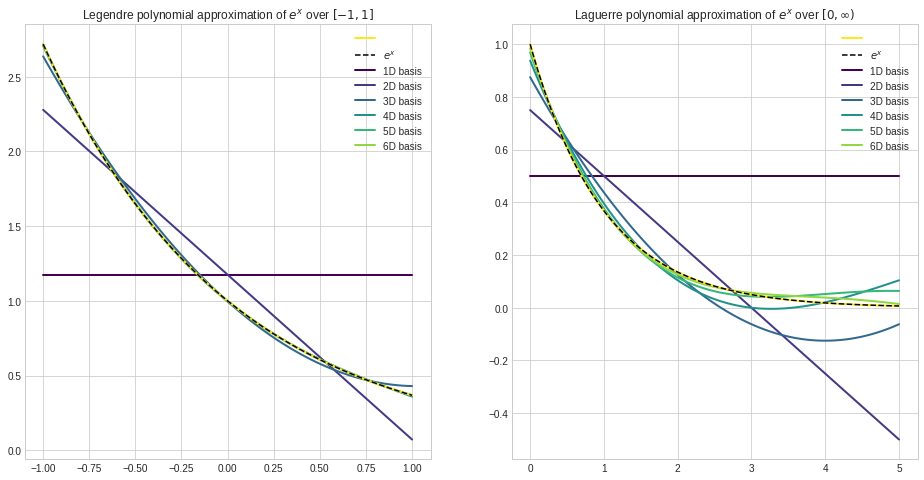

In [ ]:
# https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
import matplotlib
cmap = matplotlib.cm.get_cmap('viridis')
plt.style.use('seaborn-whitegrid')
# https://www.youtube.com/watch?v=xAoljeRJ3lU

fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

f = lambda x: np.exp(-x)

support = np.linspace(-1,1,100)
ax[0].plot(support, f(support), zorder=3, color=cmap(1.0), linewidth=2, label=' ')
ax[0].plot(support, f(support), 'k--', zorder=3, label='$e^x$')
ax[0].set_title('Legendre polynomial approximation of $e^{-x}$ over $[-1,1]$')

approximation = 0*support
K = 5
c_k = np.zeros(K+1)
for k in range(K+1):
  c_k[k] = integrate.quad(lambda x: scipy.special.eval_legendre(k, x)\
                                    *((2*k+1)/2)*f(x), -1, 1)[0]
  approximation += c_k[k]*scipy.special.eval_legendre(k, support) # not efficient (per HW1.4)
  ax[0].plot(support, approximation, color=cmap(k/(K+1)), linewidth=2,
             label=str(k+1)+"D basis")

ax[0].legend()

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_laguerre.html#scipy.special.eval_laguerre
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.genlaguerre.html
# scipy.special.genlaguerre(3,alpha=0)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.laguerre.html#scipy.special.laguerre
# scipy.special.laguerre(3)

support = np.linspace(0, 5,100)
ax[1].plot(support, f(support), zorder=3, color=cmap(1.0), linewidth=2, label=' ')
ax[1].plot(support, f(support), 'k--', zorder=3, label='$e^x$')
ax[1].set_title('Laguerre polynomial approximation of $e^{-x}$ over $[0,\infty)$')

approximation = 0*support
K = 5
c_k = np.zeros(K+1)
for k in range(K+1):
  c_k[k] = integrate.quad(lambda x: scipy.special.eval_laguerre(k, x)\
                                    *np.exp(-x)*f(x), 0, np.inf)[0]
  approximation += c_k[k]*scipy.special.eval_laguerre(k, support)
  # not efficient (per Programming Portfolio Assignment 2 problem 3)
  ax[1].plot(support, approximation, color=cmap(k/(K+1)), linewidth=2,
             label=str(k+1)+"D basis")

ax[1].legend()

*This example is inspired by the **Expansion of Functions in Orthogonal Polynomials**, **An Example** sections on pages 175-176, and **Legendre Polynomials** and **Laguerre Polynomials** sections on pages 171 and 174 of Chapter 4.3 **Orthogonal Polynomials**  of James E. Gentle's **Computational Statistics** textbook. [Errata Warning: on page 171 the normalization constant is seen to the reciprocal of $\frac{2k+1}{2}$, while $P_k(1) = 1$ for all $k$ has nothing to do the the normalization constant.]*

### [OMITTED] The Three-Term Recurrence Relation for Evaluating $f(x)$

---

***Horner's method*** and ***Minimal Newton Form*** define recursive factorizations of

$$f_k(x) = \sum_{j=0}^kw_jx^j$$

from which $f_k(x)$ may be evaluated by repeated applications of multiplication by a first order function of $x$ followed addition of a scaler value.

By recursively factoring $f_k$ one order of magnitude at a time, these methods make evaluating a polynomial computationally efficient.  E.g., ***Horner's method*** requires $k$ additions and $k$ multiplications, the minimal number required to evaluate a $k^{th}$ order polynomial $f_k(x)$.


\begin{align*}
  \\
  &  \large \text{Horner's Method} && \large  \text{Minimal Newton Form (for $x\in[a,b]$) }\\
  & \text{factor out a single $x$ at each step} && \text{$|\underset{x\in[a,b]}{g_j(x)}|>0$ has no roots, but $(|g_j(x)| - \underset{x\in[a,b]}{\min} |g_j(x)|)$ has roots $x_k = \underset{x\in[a,b]}{\text{argmin}} |g_j(x)|$}\\
  q_k = {} & q_k' + w_0 & g_{j}(x) = {} & \overbrace{(x-\xi_j)\underbrace{g_{j-1}(x)}_{>0, \; x \in [a,b]}}^{g_{j}(x)-d_j} + d_j, \quad d_j  = \underset{x \ \in [a,b]}{\text{sign}}(g_{j}(x))\underset{x \ \in [a,b]}{\min} |g_{j}(x)| = g_{j}(\xi_j) \\
\begin{array}{l}=\\\\=\end{array} {} & \begin{array}{l}x (q_{k-1}'+w_1) + w_0 \\\\ x (x(q_{k-2}'+w_2)+w_1) + w_0\end{array} &= {} & (x-\xi_j)\left(\overbrace{(x-\xi_{j-1})\underbrace{g_{j-2}(x)}_{>0, \; x \in [a,b]}}^{g_{j-1}(x)-d_{j-1}} + d_{j-1}\right) + d_j, \quad d_{j-1}  = \underset{x \ \in [a,b]}{\text{sign}}(g_{j-1}(x))\underset{x \ \in [a,b]}{\min} |g_{j-1}(x)| = g_{j-1}(\xi_{j-1}) \\
 \vdots \;\, {} &&  \vdots  \;\,  &\\
= {} & x (x( \cdots x(x(w_k) + w_{k-1}) \cdots +w_2)+w_1) + w_0 & = {} & (x-\xi_j) ((x-\xi_{j-1}) ( \cdots  ((x_1-\xi_1)(0+d_0) + d_{1}) \cdots  +d_{j-1}) + d_j \\\\
  \end{align*}
  
> I.e., ***minimal Newton form*** first factors the roots of $f_k(x)$ in the interval $[a,b]$ so
  $$f_k(x) = g_{k-R}(x)\prod_{i=1}^R(x-\xi_i), \quad |g_{k-R}(x)|>0 \text{ for } x \in [a,b]$$
  and then (recursively) reformulates $g_{j}(x)$ as $(g_{j}(x)-d_j)+d_j$ so that $(g_{j}(x)-d_j)$ is minimally vertically shifted (to \*just\* touch the $y=0$ axis in the interval $[a,b]$) allowing the new root $(x-d_j)$ to be factored from $(g_{j}(x)-d_j)$.

Like ***Horner's method*** and ***minimal Newton form***, ***truncated orthogonal basis function representations***

$$f(x) \approx \overset{\text{very inefficient}}{\underset{\text{can be avoided}}{\sum_{k=0}^K c_k q_k(x)}} \; = \sum_{k=0}^K w_k x^k$$
  
can also be efficiently recursively evaluated

- without evaluating each orthogonal basis function $q_k$ (which is itself a $k^{th}$ order polynomial that can have $k+1$ non-zero terms)
- without knowing the $w_k$ coefficient for each $x^k$ term of the final polynomial approximation (in order to apply ***Horner's method***)

using the ***three-term recurrence relation***. Reducing each $q_k(x)$ down to first order polynomials using the ***three-term recurrence relation*** and then rearranging the terms produces the now familiar "multiplication-addition recursion" for polynomial function evaluation

> \begin{align*}
  {} & \mathscr{f}_{k+2} =  \mathscr{f}_{k+1} =  0  \\
  {} & \text{for ($j = k, k-1, ..., 1$)} \{ \\
  {} & \quad \mathscr{f}_{j} =  c_j + (r_{j+1} x + s_{j+1}) \mathscr{f}_{j+1}  - t_{j+2}\mathscr{f}_{j+2}  \\
  {} & \quad \text{if(verbose){print$(\mathscr{f}_{j})$}}\\
  {} & \}\\
  f(x) \approx  {} & \mathscr{f}_{0} = c_0q_0(x)  + q_1(x) \mathscr{f}_{1} - t_2 \mathscr{f}_{2}\\ {}\\
  \end{align*}
>
>  - where $r_j, s_j$, and $t_j$ are from the ***three-term recurrence relation*** $q_k(x) = (r_k x + s_k)q_{k-1}(x) - t_kq_{k-2}(x)$
>    - e.g., for Chebyshev polynomials $r_k=2, s_k=0,$ and $t_k=1$ for $k\geq 2$
>  - $q_0$ and $q_1$ are the $0^{th}$ and $1^{st}$ order orthogonal polynomial basis function
>    - e.g., for the ***Chebyshev*** and ***Legendre*** (i.e., ***Jacobi***) and ***Chebyshev-Hermite polynomial bases*** $q_0(x) = 1$ and $q_1(x) = x$
>  - and this is the ***Clenshaw algorithm*** which is a result of the so-called ["reverse"](https://en.wikipedia.org/wiki/Clenshaw_algorithm#Clenshaw_algorithm) or ["downward"](https://mathworld.wolfram.com/ClenshawRecurrenceFormula.html) ***Clenshaw recurrence formula***
    - which is usually given in terms of an alternatively indexed parameterization of the ***three-term recurrence relation***
      $$q_{k+1}(x) = \alpha_k(x)q_{k}(x) + \beta_k(x)q_{k-2}(x)$$

  
*This problem is inspired by Algorithm 4.1 **Evaluation of a Truncated Expansion in Orthogaonal Polynomials at $x$** and the **Computations Involving Polynomials** and **Relations among the Members of an Orthogonal System** sections of Chapter 4.3 **Orthogonal Polynomials** on pages 168-170 of James E. Gentle's **Computational Statistics** textbook. [Errata Warning: however, equation 4.41 (termed the "Nested Newton Form") is a unique **Newton Polynomial** whose "centers" cannot be changes without corresponding adjustments of the coefficients $\{c_k\}$ so the subsequent statement*

> *...for careful choices of the "centers" $a_i$, it has good numerical stability*

*is confused because (despite appearing to) this doesn't actually refer to the "Nested Newton Form" but instead refers to the evaluation of a differently parameterized **Newton Polynomial** constructed using the **Minimal Newton Form** introduced above which automatically specifies 'careful choices of the "centers"' providing "good numerical stability" as detailed in the "Stable Evaluation of Polynomials" manuscript by Mesztenyi and Witzgall (1967) ([available here](https://scicomp.stackexchange.com/questions/13023/accurate-polynomial-evaluation-in-floating-point)); and $q$ is a misprint and should be $f$ in Algorithm 4.1 on page 170; and the subscripts for $r, t$, and $s$ are off by one relative to the previous notation given for the "three-term recursion formula" in equation 4.39 on page 168; and the `for` loop goes to $0$, but the formulas for $r_k,s_k,$ and $t_k$ only apply for $k \geq 2$ since they are based on first specifying $q_0(x)$ and $q_1(x)$.]*

<a name="cell-f-poly-eval"></a>
### [OMITTED] The Christoffel-Carboux Formula for Evaluating $f(x)f(y)$ ([Return to TOC](#cell-TOC-f))

---

$\require{cancel}$

1. For ***orthogonal*** polynomials $q_k$, i.e.,

$$\langle q_k, q_j \rangle = \int_D q_k(x) q_j(x) w(x) dx = 0$$

2. of increasing order $k$, there is an $r_k$ (not involving $x$) such that

$$q_k(x) - r_k x q_{k-1}(x)$$

3. is a order $k-1$ polynomial, and so can be represented by the linear combination

$$q_k(x) - r_k x q_{k-1}(x) = \sum_{k=0}^{k-1} a_k q_k(x)$$

4. But all that is needed is $j$ from $k-2$ to $k-1$, i.e.,

  $$q_k(x) - r_k x q_{k-1}(x) = \sum_{j=k-2}^{k-1} a_j q_j(x)$$

  because $q_{k'}$ is orthogonal to $q_{k-1}$ and $q_{k-2}$ for $k'<k-2$ since

  \begin{align*}
 \langle q_{k'}, \; q_k \! - \! r_k x q_{k-1} \rangle  = {} &  \cancel{\langle q_{k'}, \; q_k \rangle}^0 - \langle q_{k'}, \; r_k x q_{k-1} \rangle\\
 = {} & - \langle q_{k'}, \; r_k x q_{k-1} \rangle \quad (\text{can be nonzero for }k'=k-1)\\
 = {} & - \langle x q_{k'}, \; r_k  q_{k-1} \rangle \quad (\text{can be nonzero for }k'=k-2)\\
 = {} & 0 \quad\quad\quad\quad\quad\quad\;\;\;(\text{for }k'<k-2 \text{ as }  xq_{k-3} {\perp \!\!\!\perp} q_{k-1})
  \end{align*}

  but then for $q_{k'}$ with $0\leq k'<k$

  \begin{align*}
 \left\langle q_{k'}, \sum_{j=0}^{k-1} a_j q_j \right\rangle  = {} &  \langle q_{k'}, \; q_k \! - \! r_k x q_{k-1} \rangle \\
 \Longrightarrow \left\langle q_{k'}, \sum_{j=0}^{k-3} a_j q_j \right\rangle  = {} & 0 \quad \Longrightarrow \quad \text{$a_j=0$ for $j < k-2$}
  \end{align*}

  and for a fuller proof please see [Theorem 1 here](https://homepage.tudelft.nl/11r49/documents/wi4006/orthopoly.pdf).

5. Thus we have the so-called ***three-term recurrence relation***

$$q_k(x) = (r_k x + a_{k-1})q_{k-1}(x) + a_{k-2}q_{k-2}(x)$$

$$\text{or, converting the notation above into the more standard form}$$

$$q_k(x) = (r_k x + s_k)q_{k-1}(x) - t_kq_{k-2}(x)$$

6. from which, [as seen here](https://homepage.tudelft.nl/11r49/documents/wi4006/orthopoly.pdf), we have ***Christoffel-Carboux formula*** for approximating the product of an arbitrary function at two points

  $$f(x)f(y) \approx \sum_{k=0}^K c_k^2 q_k(x) q_k(y) = c_K^2 \frac{a_K}{a_{K+1}}\frac{q_{K+1}(x)q_K(y)-q_{K+1}(y)q_K(x)}{x-y}$$

  since

  \begin{align*}
 {} & q_{k+1}(x)q_k(y)-q_{k+1}(y)q_k(x) \\
 = {} &\left[(r_{k+1} x + s_{k+1})q_{k}(x) - t_{k+1}q_{k-1}(x)\right]q_k(y)-\left[(r_{k+1} y + s_{k+1})q_{k}(y) - t_{k+1}q_{k-1}(y)\right]q_k(x)\\
 = {} & \left[r_{k+1} xq_{k}(x) - t_{k+1}q_{k-1}(x)\right]q_k(y)-\left[r_{k+1} yq_{k}(y) - t_{k+1}q_{k-1}(y)\right]q_k(x) \\
 = {} & r_{k+1}(x-y)q_{k}(x)q_{k}(y) + t_{k+1}(q_k(x)q_{k-1}(y) - q_k(y)q_{k-1}(x)) \\
  \end{align*}

  so

  \begin{align*}
  {} & \sum_{k=0}^K (x-y)c_k^2 q_{k}(x)q_{k}(y) \\
= {} & \sum_{k=0}^K c_k^2 \frac{(q_{k+1}(x)q_k(y)-q_{k+1}(y)q_k(x)) - t_{k+1}(q_k(x)q_{k-1}(y) - q_k(y)q_{k-1}(x))}{r_{k+1}} \\
= {} & \sum_{k=0}^K c_k^2 \left( \frac{q_{k+1}(x)q_k(y)-q_{k+1}(y)q_k(x)}{r_{k+1}} - \frac{q_k(x)q_{k-1}(y) - q_k(y)q_{k-1}(x)}{r_{k}}\right) = c_K^2 \frac{q_{K+1}(x)q_K(y)-q_{K+1}(y)q_K(x)}{r_{K+1}} \\
  \end{align*}

  where $t_{k+1} = \frac{r_{k+1}}{r_{k}}$ because (assuming ***orthonormal*** $\{q_k\}$ for simplicity)

  \begin{align*} t_{k+1} = \langle q_{k-1},t_{k+1}q_{k-1}\rangle = {} & \langle q_{k-1}, r_{k+1} xq_{k} + s_{k+1}q_{k} - q_{k+1} \rangle \\
 = {}  & \langle q_{k-1},r_{k+1} xq_{k}\rangle + \langle q_{k-1},s_{k+1}q_{k}\rangle - \langle q_{k-1}, q_{k+1}\rangle \\
 = {} & \langle q_{k-1},r_{k+1} xq_{k}\rangle \\  
 = {} & \langle (r_{k} x)^{-1}q_{k},r_{k+1} xq_{k}\rangle = \frac{r_{k+1}}{r_{k}} \end{align*}

  because
  - $q_{k-1} = (r_{k} x)^{-1}\underset{\quad \quad \text{so $\langle q_k,q_j\rangle$ cancels}}{\overset{\quad \quad q_k {\perp \!\!\! \perp} q_j\, j=0,\cdots,k-1 }{\left(q_{k} + {\cancel{\sum_{j=0}^{k-1} a_j q_j}}\right)}}$

  - because $r_{k}$ is the ratio of the coefficients of the highest order terms in $q_k$ and $q_{k-1}$ in order to satisfy
  $$\mathbf{q_{k}(x) = r_{k} xq_{k-1}(x)} + s_{k}q_{k-1}(x) - t_{k}q_{k-2}(x)$$
  
  and
  - $r_{k+1} = \frac{a_{k+1}}{a_k}$ where $a_k$ is the coefficient of the highest order term in $q_k$ for the same reason.
  
<!-- [Programming Portfolio Assignment 2 Problem 3](#cell-f)  -->

> The next section will examine the efficient evaluation of
>
> $$f(x) \approx \sum_{k=0}^K c_kq_k(x)$$
>
> for ***orthogonal polynomials*** $q_k$ which can be done without having to compute every $q_k(x)$ (which can involve $k$ terms) in the summation, just as the ***Christoffel-Carboux formula*** examined here
>
> $$f(x)f(y) \approx \sum_{k=0}^K c_k^2 q_k(x) q_k(y) = c_K^2 \frac{a_K}{a_{K+1}}\frac{q_{K+1}(x)q_K(y)-q_{K+1}(y)q_K(x)}{x-y}$$
>
> avoids cacluating every term in the summation.
>
> - ~~Programming Portfolio Assignment 2 Problem 4] will examine the efficiency of other common statistical functions and other topics encountered in this course using code timing.~~

<a name="cell-f-poly-sob"></a>

### Details and Examples ([Return to TOC](#cell-TOC-f))

---

The ***three-term recurrence relations*** as well as weight functions and implied normalizing constants defining each of the ***standard orthogonal polynomial bases*** are given below.
- The ***recursion formula*** identities are dependent on the interval of the domain, and the terms here are given in the traditional interval of each standard polynomial; but, these can be arbitrarily changed through scale-shift ***change of variables*** transformations.
- ***Standard polynomial basis functions*** are not always ***normalized*** (i.e., ***orthonormal***); in fact, it's usually more important to scale them so they have a full set of distinct real roots or so the coefficient of the  largest degree ***monomial*** used in the trucation is $1$.
  - The standard polynomial basis functions given here have a full set of real roots.
- The ***Legendre***, ***Chebyshev***, and ***Hermite*** polynomials of ***even*** and ***odd*** degree are, respectively
  - ***even functions*** so $f(x) = f(-x)$ and
  - ***odd functions*** so $f(x) = -f(-x)$.

#### [OMITTED] Legendre Polynomials $P_k$
---

***Legendre polynomials*** are formed as the solution to ***Legendre's equation***

$$(1-x^2)u'' - 2xu' + k(k+1)u = 0$$

and ***discretized Legendre Polynomials***, useful as ***independent constrasts*** in linear model contexts, appear as the $Q$-matrix of a ***QR decomposition*** of the usual ***Vandermonde matrix***

$$\left[\begin{array}{cccc}1&x_1&x_1^2&\cdots\\1&x_2&x_2^2&\cdots\\\vdots&\vdots&\vdots& \ddots \\1&x_n&x_n^2&\cdots\end{array}\right]$$

constructed for a grid over $[-1,1]$.

|Normalizing constant|Three-Term Recurrence Relation|
|-|-|
|$$\displaystyle \int^1_{-1} P_k(x)^2 dx = \frac{2}{2k+1} = P_k(1)^{1/2}$$|$$r_k=(2k-1)/k, \; s_k=0, \; t_k=(k-1)/k$$|

#### [OMITTED] Chebyshev Polynomials $T_k$

---

***Chebyshev polynomials*** have the simplest ***three-term recurrence relations***, so their evaluation is extremely simple relative to the other ***basis functions***.

|Normalizing constant|Three-Term Recurrence Relation|
|-|-|
|$$\displaystyle \int^1_{-1} T_k(x)^2 (1-x^2)^{-1/2} dx \quad \text{(for the first kind)}$$| $$r_k=2, \; s_k=0, \; t_k=1$$|
|$$\displaystyle \int^1_{-1} T_k(x)^2 (1-x^2)^{1/2} dx \quad \text{(for the second kind)}$$|

#### [OMITTED] Jacobi Polynomials $Q_k$

---

***Jacobi polynomials*** are the general form from which ***Legendre*** and ***Chebyshev polynomials*** are derived, and use a beta distribution weight function.

|Normalizing constant||
|-|-|
|$$\displaystyle \int^1_{-1} Q_k(x)^2 (1-x)^\alpha(1+x)^\beta dx, \alpha,\beta > -1$$| $\alpha=\beta=0$ for ***Legendre polynomials***|
||$\alpha=\beta=\pm 1/2$ for ***Chebyshev polynomials***|

#### [OMITTED] Laguerre Polynomials $L_k^{(\alpha-1)}$

---

***Laguerre polynomials*** are defined for a domain that is bounded on only one side, and use a gamma distribution weight function whose parameter $\alpha$ controls the shape of the ***basis functions***.  

|Normalizing constant|Three-Term Recurrence Relation|
|-|-|
|$$\displaystyle \int^1_{-1} L_k(x)^2 x^{\alpha-1}e^{-x} dx$$|$$r_k=-\frac{1}{k}, \; s_k=\frac{2k-1}{k}, \; t_k=\frac{k-1}{k}$$|
|$\alpha=1$ is the most common choice|

#### [OMITTED] Chebyshev-Hermite Polynomials $H_k^e$

---

***Chebyshev-Hermite polynomials*** $H_k^e$ are a variant on the ***Hermite polynomials*** $H_k$ where the exponent in the weight function is divided by $2$ to make it a normal density rather than the ***error function*** $e^{-x^2}$.

|Normalizing constant|Three-Term Recurrence Relation|
|-|-|
$$\displaystyle \int^1_{-1} H^e_k(x)^2 e^{-x^2/2} dx$$|$$r_k=1, \; s_k=0, \; t_k=k-1$$|

Treating the **Hermite polynomial** weight function $e^{-x^2}$ as part of the each polynomial ***basis function*** so

$$\left\langle H_k(x), H_{k'}(x) \right\rangle = \int H_k(x) H_{k'}(x)e^{-x^2} dx =\int \left(e^{-\frac{x^2}{2}} H_{k'}(x)\right) \left(e^{-\frac{x^2}{2}} H_{k'}(x)\right) dx$$
produces the so-called ***Hermite functions*** $e^{-\frac{x^2}{2}}H_k(x)$, which are ***exponentially tilted*** polynomials. These are another useful variant because the constant weight function is computationally convenient, and the tilting will improves the approximation in some circumstances.

<a name="cell-f-examples-gram"></a>

#### [OMITTED] Density Approximation with Chebyshev-Hermite Polynomials ([Return to TOC](#cell-TOC-f))

---

Just as the $k^{th}$ derivative of the ***moment generating function*** $M(t)$ evaluted at $t=0$ gives the $k^{th}$ ***raw moment***

- $\displaystyle M(t) = 1+\sum_{k=1}^\infty \frac{E[X^k] t^k }{k!} \quad \Longrightarrow \quad \frac{d^k}{dt^k}M(t)|_{t=0} = E[X^k]$

so too does the $k^{th}$ derivative of the ***cumulant generating function*** $K(t) = \log M(t)$ evaluted at $t=0$ gives the $k^{th}$ ***cumulant***

- $\displaystyle K(t) = \sum_{k=1}^\infty \frac{\kappa_k t^k }{k!} \quad \Longrightarrow \quad \frac{d^k}{dt^k}K(t)|_{t=0} = \kappa_k$

> - $\kappa_1 = \frac{d}{dt}\log(M(t))|_{t=0} = \frac{M'(t)}{M(t)}|_{t=0} = \frac{E[X]}{1} = \mu$
> - $\kappa_2 = \frac{d^2}{dt^2}\log(M(t))|_{t=0} = \frac{d}{dt}M(t)^{-1}M'(t)|_{t=0} = M''(t)M(t)^{-1} - M(t)^{-2}M(t)'M(t)' = E[X^2] - E[X]^2 = \sigma^2$

And just as density functions $p_X(x)$ can be defined by their ***moment generating*** or ***characteristic functions***, they can also be defined in terms of their ***cumulant function*** as can be seen from the ***inversion formula*** (i.e., ***complex conjugate***) of the ***characteristic function $\varphi_{X}(k)$***

\begin{align*}
p_X(x) \propto {} & \int_{-\infty}^\infty e^{-itx} \varphi_{X}(t) dt
= \int_{-\infty}^\infty e^{-itx} M_{X}(it) dt\\
= {} & \int_{-\infty}^\infty e^{-itx} e^{K_{X}(it)} dt = \int_{-\infty}^\infty e^{-itx} \overbrace{\exp\left(\sum_{k=1}^\infty \frac{\kappa_k (it)^k }{k!}\right)}^{\varphi_{X}(t)} dt
\end{align*}

Any other ***characteristic function*** $\psi_X(t)$ with density function $f_X$ and cumulants $\gamma_k$ matching $\varphi_{X}(t)$ (i.e., $\gamma_k = \kappa_k$) for $k \leq 2$ can thus be expressed as

$$\psi_{X}(t) = \psi_X(t)\varphi_{X}(t)^{-1}\varphi_{X}(t) = \exp\left(\sum_{k=3}^\infty \frac{(\gamma_k - \kappa_k) (it)^k }{k!}\right)\varphi_X(t)$$

so by substituting $p_X(x)$ for $\varphi_X(t)$, and $(-1)^{k} \frac{d^k}{dx^k}$ for $(it)^k$ because their ***duality*** in the the ***inversion formula***

\begin{align*}
(-1)^{k} \underset{\text{dual I}}{\boxed{\frac{d^k}{dx^k}}} \underset{\text{dual II}}{\boxed{p_X(x)}} \propto {} & (-1)^{k} \frac{d^k}{dx^k} \int_{-\infty}^\infty e^{-itx} \varphi_{X}(t) dt
= \int_{-\infty}^\infty (-1)^{k} \frac{d^k}{dx^k} e^{-itx} \varphi_{X}(t) dt \\
= {} & \int_{-\infty}^\infty (-1)^{k} (-it)^k e^{-itx} \varphi_{X}(t) dt
= \int_{-\infty}^\infty e^{-itx} \overbrace{\underset{\text{of }(-1)^{k} p_X^{(k)}(x) }{\overset{\text{dual I}}{\boxed{(it)^k}} \overset{\text{dual II}}{\boxed{\varphi_{X}(t)}} }}^{\text{characteristic function}}_{\text{by inversion formula}} dt
\end{align*}

and using an expansion of $e^x$ in terms of [*Bell polynomials*](https://en.wikipedia.org/wiki/Bell_polynomials)

$$\underset{f_X(x)\, \Leftrightarrow \,\psi_{X}(t)}{\quad f_X(x) \, = } \; \underset{\text{$p_X(x) \,\Leftrightarrow\, \varphi_X(t)$ and $(-1)^{k}\! \frac{d^k}{dx^k}\, \Leftrightarrow \; (it)^k$}}{\exp\left(\sum_{k=3}^\infty \frac{(\gamma_k - \kappa_k) (-1)^{k} \frac{d^k}{dx^k} }{k!}\right)p_X(x)}
 = \underset{\text{Bell polynomial expansion of } \exp(\cdots)}{\left(1 + \sum_{k=3}^\infty \frac{(\gamma_k - \kappa_k) (-1)^{k} \frac{d^k}{dx^k} }{k!} + \cdots\right)}p_X(x)$$

Using normally distributed $p_X(x) = \phi_X(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$ means $\kappa_k = 0$ for $k>2$ and so

\begin{align*}
f_X(x) &= \underset{\phi(x)}{p_X(x)} + \frac{1}{\sqrt{2\pi \sigma^2}} \sum_{k=3}^\infty \frac{\gamma_k  }{k!}  (-1)^{k} \frac{d^k}{dx^k} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} \\
\end{align*}

which can be writen in terms of the ***generating function*** of the ***Chebyshev-Hermite polynomials***

$$H^e_{k}(z) = (-1)^{n}e^{\frac {z^{2}}{2}}{\frac {d^{k}}{dz^{k}}}e^{-{\frac {z^{2}}{2}}}$$

so

\begin{align*}
f_X(x) = {} & \phi(x) + \frac{1}{\sqrt{2\pi \sigma^2}}\sum_{k=3}^\infty \frac{\gamma_k }{k!\sigma^k}  e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} H^e_{k}\left(\frac{x-\mu}{\sigma}\right) \\
= {} & \phi(x)\left( 1 + \sum_{k=3}^\infty \frac{\gamma_k }{k!\sigma^k}  H^e_{k}\left(\frac{x-\mu}{\sigma}\right) \right)
\end{align*}


And ***truncated approximations*** from this specification are called ***Gram–Charlier series***.

> Two similar approximations are the [Edgeworth series](https://en.wikipedia.org/wiki/Edgeworth_series#The_Edgeworth_series) and [Cornish-Fisher expansion](https://en.wikipedia.org/wiki/Cornish%E2%80%93Fisher_expansion). These also use ***Chebyshev-Hermite polynomials*** in a similar form to that above; but, they are derived in different ways which leads to selections of different ***Chebyshev-Hermite polynomials***, and slighly different weightings for selected polynomials.
> - Note that depending on the application and specific evaluations $f(x_0)$ that are required, it's not necessarily the case that ***Fourier coefficients*** for the selected ***Chebyshev-Hermite polynomials*** would be optimal.  ***Fourier coefficients*** are optimal in the minimal $L_2$-***norm*** sense, but this is a funtion of the entire function $f$ and not just specific evaluations $f(x_0)$.

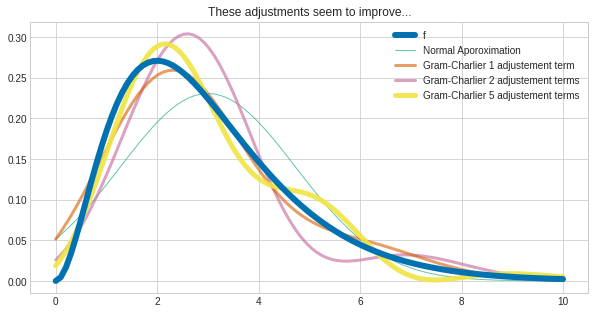

In [ ]:
# https://matplotlib.org/3.1.1/gallery/misc/zorder_demo.html
plt.figure(figsize=(10,5))
support = np.linspace(0,10,100)

# https://en.wikipedia.org/wiki/Gamma_distribution
k, theta = 3, 1
f = stats.gamma(a=k, scale=theta)
plt.plot(support, f.pdf(support), linewidth=6, zorder=5, label='f')

# NOT CORRECT (central and sample moments aren't cumulants):
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html
# cumulants = f.stats(moments='mvsk')
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstat.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moment.html

# CORRECT (for theta=1):
# https://mathworld.wolfram.com/GammaDistribution.html
cumulants = [k * scipy.special.gamma(j) for j in range(1,10)]


norm_approx = stats.norm(loc=cumulants[0], scale=cumulants[1]**0.5)
plt.plot(support, norm_approx.pdf(support), linewidth=1, zorder=1, alpha=0.6,
         label = 'Normal Aporoximation')

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_hermitenorm.html
# chebyshev_hermite = lambda k,x: np.polynomial.hermite_e.HermiteE(k)((x-cumulants[0])/cumulants[1]**0.5)
# https://numpy.org/doc/stable/reference/routines.polynomials.hermite_e.html
# https://numpy.org/doc/stable/reference/generated/numpy.polynomial.hermite_e.HermiteE.html#numpy.polynomial.hermite_e.HermiteE

adjustment_term = lambda k,x: (cumulants[k-1])/(scipy.special.gamma(k+1)*(cumulants[1]**0.5)**k)\
                              *scipy.special.eval_hermitenorm(k, (x-cumulants[0])/cumulants[1]**0.5)

plt.plot(support, norm_approx.pdf(support)*(1+adjustment_term(3,support)),
         linewidth=3, zorder=4, alpha=0.6, label = 'Gram-Charlier 1 adjustement term')

plt.plot(support, norm_approx.pdf(support)*(1+adjustment_term(3,support)\
                                             +adjustment_term(4,support)),
         linewidth=3, zorder=3, alpha=0.7, label = 'Gram-Charlier 2 adjustement terms')

plt.plot(support, norm_approx.pdf(support)*(1+adjustment_term(3,support)\
                                             +adjustment_term(4,support)\
                                             +adjustment_term(5,support)\
                                             +adjustment_term(6,support)\
                                             +adjustment_term(7,support)),
         linewidth=5, zorder=4, alpha=0.9, label = 'Gram-Charlier 5 adjustement terms')

plt.title("These adjustments seem to improve...")
_ = plt.legend()

*This example is inspired by the **Expansion of Probabililty Density Functions** section of Chapter 4.2 **Basis Sets in Function Spaces** on page 165, **equations 4.32 and 4.33** on pages 165 and 166, and the discussion at the end of the **Hermite Polynomials** section in Chapter 4.3 **Orthogonal Polynomials** of pages 174-175 in James E. Gentle's **Computational Statistics** textbook. The presentation there relied upon wikipedia's [Edgeworth Series)](https://en.wikipedia.org/wiki/Edgeworth_series#The_Edgeworth_series) article, and Wallace's (1958) ["Asymptotic Approximations to Distributions"](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-29/issue-3/Asymptotic-Approximations-to-Distributions/10.1214/aoms/1177706528.full)
manuscript, especially the inversion formula duality given in equations 3.1 and 3.2.*

<a name="cell-f-dnn"></a>

## 5.3.5 Deep Neural Networks (DNNs) ([Return to TOC](#cell-TOC-f))

---

A Deep Neural Network (DNN) is a sequence of alternating transformations

$$q_K \circ (A_K \{ \cdots \{q_2 \circ (A_2\{q_1 \circ (A_1x + b_1)\} + b_2)\} \cdots \} + b_K)$$

where $A_jx + b_j$ are ***affine transformations*** and $\{q_j\circ (A_jy_j + b_j)\}$ are [elementwise](https://math.stackexchange.com/questions/2324764/notation-for-element-wise-function-application) non-linear transformation of affine transformations; so, DNNs definte alternative applications of (a) affine transformations and (b) elementwise non-linearly transformations of the previous affine transformations.

DNNs are the most flexible function approximation methodology available today. To get a sense of how flexible and powerful DNNs are, check out this [interactive webpage](https://arogozhnikov.github.io/3d_nn/).

|||||
|-|-|-|-|
|![](https://drive.google.com/uc?id=1mPWLh1_DXT0sMyytV07cVe6mfbmIbxqc)|![](https://drive.google.com/uc?id=1IeLjer2rJ7sSi0zkE64kgEEXwNHzEyo7)|![](https://drive.google.com/uc?id=1v2GnmQg-CmQ46bbHsE7kalW8ukPpuhHY)|![](https://drive.google.com/uc?id=1vGK6al1eFQe-_rK306Jc3GNpBEWio_81)|
|![](https://drive.google.com/uc?id=1vJ4iTvdAXzZVQrJBkDdwIY72680G1bDR)|![](https://drive.google.com/uc?id=1fAVmPTzcux9eU2uauDU5VhirQL6IaAbO)|![](https://drive.google.com/uc?id=17AYwE9H9-2oGU52aIzhx5E87zmDc7YfM)|![](https://drive.google.com/uc?id=1btfBgFwi8ttA33h3T6KDIKP_NorEg55l)|

After completing this course you will be more than capable read about and understand [DNN theory](https://www.deeplearningbook.org/), as well as begin [coding and using DNN models](https://d2l.ai/).

<a name="cell-f-fourier"></a>

# 5.4 Fourier Series and Transforms ([Return to TOC](#cell-TOC-f))

---

Here are some quite compelling introductions to "Fourier stuff".

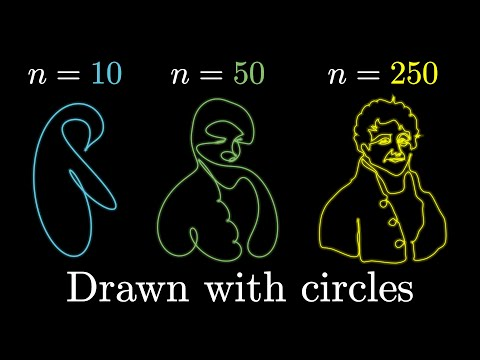

In [ ]:
# drawing automation (https://www.youtube.com/watch?v=r6sGWTCMz2k)
YouTubeVideo('r6sGWTCMz2k')

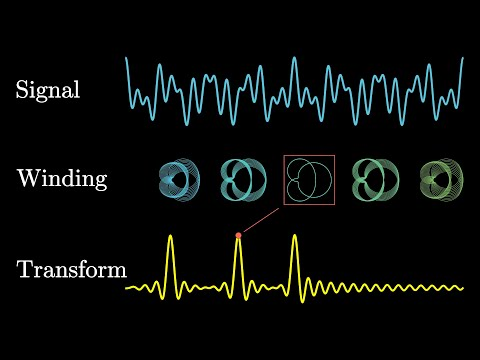

In [ ]:
# function decomposition (https://www.youtube.com/watch?v=spUNpyF58BY)
YouTubeVideo('spUNpyF58BY')

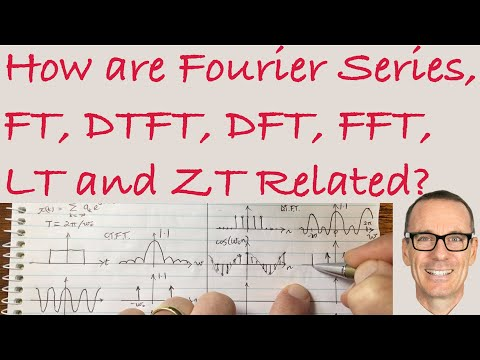

In [ ]:
# Fourier Flavors (https://www.youtube.com/watch?v=2kMSLqAbLj4)
YouTubeVideo('2kMSLqAbLj4')